In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()


Reading = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Readworks.Reading.ccu01.csv')


In [136]:
### Data from Roster page inserted
Roster = pd.read_excel('~/Desktop/Projects/RAYSE ACADEMY/Khan.Academy.August/Roster.xlsx',
                        sheetname='ROA')

Attendance = pd.read_excel('~/Desktop/Projects/RAYSE ACADEMY/Khan.Academy.August/Roster.xlsx',
                        sheetname='Attendance')

In [138]:
### Filter for students who have a ccu01 id attached to their account


Reading = Reading[Reading['Students'].str.contains('ccu01')]

In [139]:
Reading.shape

(149, 7)

149 have a Readworks account with their respective ccu0 Id matched. there are around 30 names on Readworks with no ccu Id.

In [140]:
mp = Roster.ID

In [141]:
# Extract ccu IDs and create seperate column
s = Reading['Students'].str.split().str[-1]
Reading = pd.concat([Reading, s], axis=1)

In [143]:
Reading.columns.values[0] = 'Name'

In [144]:
# Find Students with ccu01Ds that match with the Roster
    
ccuRead = Reading[Reading.Students.isin(mp)]
not_ccuRead = Reading[~Reading.Students.isin(mp)]    
    

In [145]:
# Who are the students without mathcing IDs from the roster
not_ccuRead



,Name,Nonfiction Articles Read,Nonfiction Words Read,Literary Articles Read,Literary Words Read,Total Articles Read,Total Words Read,Students
77,Nikhat Parveen ccu01s256,14.0,1209.0,8.0,576.0,22.0,1785,ccu01s256
153,Zainab Shakir ccu01s380,16.0,1429.0,9.0,653.0,25.0,2082,ccu01s380


__NOTES__

It's my impression that despite the previous two students not having a matching ID on the Roster, they are on attending the academy. The issue is with how their ID is inputed on the Roster, which the responsible party should into. The one issue identified with Nikhat Parveen is that she is registered as 'ccu01s0256' with a 0 where it shouldn't be.







In [146]:
ccuRead.shape

(147, 8)

__NOTES__

There are 147 out 181 kids from the roster with a matching ID, and there are 34 students with no matching ID.

In [147]:
ccuRead['Total Words Read'] = ccuRead['Total Words Read'].astype(int)

/Users/georgesericcolbert/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [149]:
ccuRead['Total Words Read'].describe()

count     147.000000
mean     1812.945578
std      1381.423158
min         0.000000
25%       852.500000
50%      1770.000000
75%      2443.000000
max      7257.000000
Name: Total Words Read, dtype: float64

__NOTES__

The Average number of Words read is 1812, with a standard deviation of 1381 words indicating there is a wide range of performance amonsgt students.  The max number of words for a student is 7527.




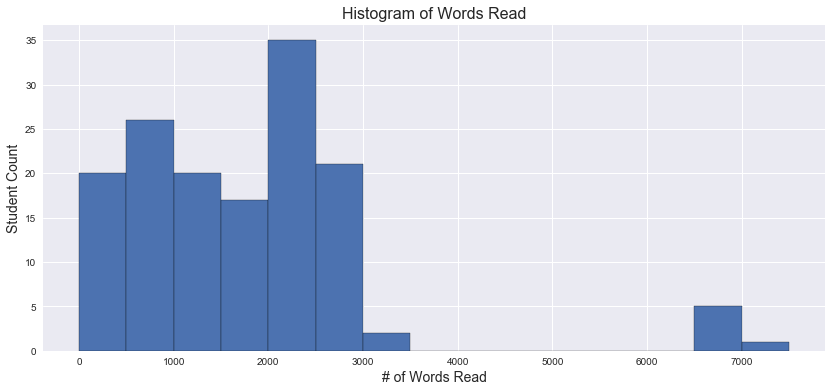

In [319]:
# Histogram of Words Read
bin_values = np.arange(start=0, stop=8000, step=500)

ccuRead['Total Words Read'].hist(bins=bin_values, figsize=[14,6], ec='black')
plt.title('Histogram of Words Read',fontsize=16)
plt.ylabel('Student Count',fontsize=14)
plt.xlabel('# of Words Read',fontsize=14)

__Students With More Than 6000 words Read__

In [187]:
Over_ach = ccuRead.loc[ccuRead['Total Words Read'] > 5000]
Over_ach

,Name,Nonfiction Articles Read,Nonfiction Words Read,Literary Articles Read,Literary Words Read,Total Articles Read,Total Words Read,Students
34,Sumaiya Ashraf ccu01s056,26.0,6457.0,10.0,800.0,36.0,7257,ccu01s056
50,Umme Habiba ccu01s094,24.0,6158.0,10.0,800.0,34.0,6958,ccu01s094
56,Saiqua Parveen ccu01s102,24.0,6158.0,10.0,800.0,34.0,6958,ccu01s102
57,Sabrun Nessa ccu01s104,24.0,6158.0,10.0,800.0,34.0,6958,ccu01s104
59,Nikhat Parveen ccu01s108,24.0,6158.0,10.0,800.0,34.0,6958,ccu01s108
132,Iqra Akhtar ccu01s347,24.0,6158.0,10.0,800.0,34.0,6958,ccu01s347


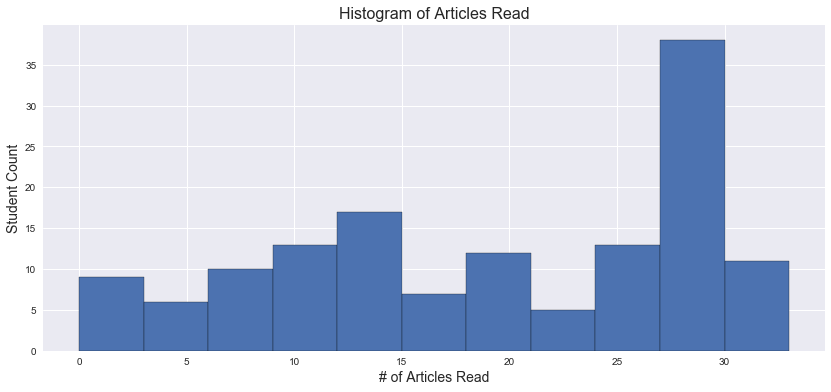

In [320]:
# Histogram of Articles Read
bin_values = np.arange(start=0, stop=36, step=3)

ccuRead['Total Articles Read'].hist(bins=bin_values, figsize=[14,6], ec='black')
plt.title('Histogram of Articles Read',fontsize=16)
plt.ylabel('Student Count',fontsize=14)
plt.xlabel('# of Articles Read',fontsize=14)

__Students With More than 30 Articles Read__

In [174]:
ccuRead.loc[ccuRead['Total Articles Read'] > 30]

,Name,Nonfiction Articles Read,Nonfiction Words Read,Literary Articles Read,Literary Words Read,Total Articles Read,Total Words Read,Students
34,Sumaiya Ashraf ccu01s056,26.0,6457.0,10.0,800.0,36.0,7257,ccu01s056
50,Umme Habiba ccu01s094,24.0,6158.0,10.0,800.0,34.0,6958,ccu01s094
56,Saiqua Parveen ccu01s102,24.0,6158.0,10.0,800.0,34.0,6958,ccu01s102
57,Sabrun Nessa ccu01s104,24.0,6158.0,10.0,800.0,34.0,6958,ccu01s104
59,Nikhat Parveen ccu01s108,24.0,6158.0,10.0,800.0,34.0,6958,ccu01s108
110,Khusnuma Alam ccu01s318,21.0,2250.0,10.0,800.0,31.0,3050,ccu01s318
118,Naushin Islam ccu01s326,21.0,2250.0,10.0,800.0,31.0,3050,ccu01s326
132,Iqra Akhtar ccu01s347,24.0,6158.0,10.0,800.0,34.0,6958,ccu01s347


In [176]:
###



ComprehensionQ = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Readworks.ComprehensionQ.ccu01.csv')

In [177]:
### Filter for students who have a ccu01 id attached to their account


ComprehensionQ = ComprehensionQ[ComprehensionQ['Students'].str.contains('ccu01')]

In [178]:
# Extract ccu ID and create seperate column
s = ComprehensionQ['Students'].str.split().str[-1]

CompQ = pd.concat([ComprehensionQ, s], axis=1)

In [179]:
CompQ.columns.values[0] = 'Name'
CompQ.columns.values[-1] = 'ID'

In [180]:
# Find Students with ccu01Ds that match with the Roster
    
compQ = CompQ[CompQ['ID'].isin(mp)]
not_compQ = CompQ[~CompQ['ID'].isin(mp)]    



In [181]:
not_compQ

,Name,Question Sets Submitted,Question Sets Assigned,Correct,Graded,% Correct,ID
77,Nikhat Parveen ccu01s256,22.0,33.0,84.0,90.0,93%,ccu01s256
153,Zainab Shakir ccu01s380,25.0,33.0,72.0,101.0,71%,ccu01s380


In [182]:
compQ['Percent'] = compQ['Correct']/compQ['Graded']

/Users/georgesericcolbert/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


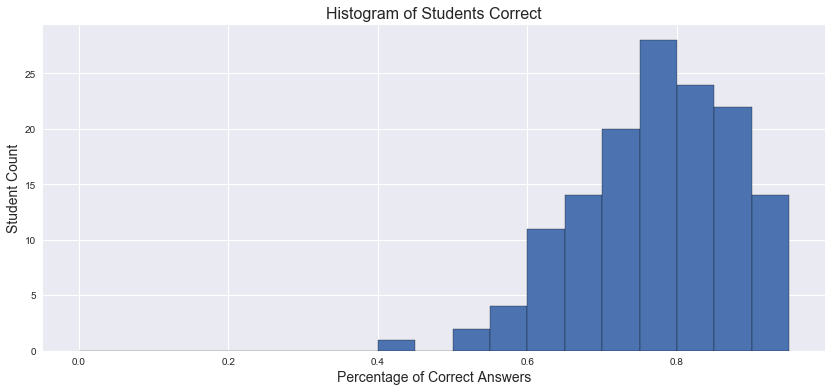

In [321]:
# Histogram of Correct Answers
bin_values = np.arange(start=0, stop=1, step=0.05)

compQ['Percent'].hist(bins=bin_values, figsize=[14,6], ec='black')
plt.title('Histogram of Students Correct',fontsize=16)
plt.ylabel('Student Count',fontsize=14)
plt.xlabel('Percentage of Correct Answers',fontsize=14)

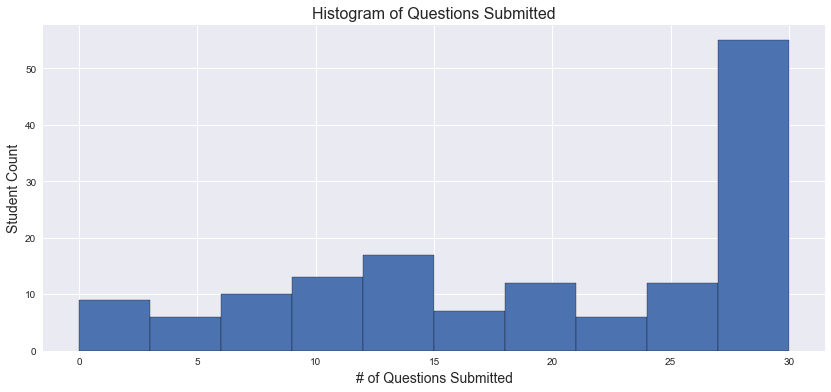

In [322]:
# Histogram of Questions Submitted
bin_values = np.arange(start=0, stop=33, step=3)

compQ['Question Sets Submitted'].hist(bins=bin_values, figsize=[14,6], ec='black')
plt.title('Histogram of Questions Submitted',fontsize=16)
plt.ylabel('Student Count',fontsize=14)
plt.xlabel('# of Questions Submitted',fontsize=14)

In [329]:
ccuRead.tail()

,Name,Nonfiction Articles Read,Nonfiction Words Read,Literary Articles Read,Literary Words Read,Total Articles Read,Total Words Read,Students
148,Hena Khatoon ccu01s372,14.0,1212.0,8.0,576.0,22.0,1788,ccu01s372
149,Alisha Khatoon ccu01s374,17.0,1569.0,7.0,593.0,24.0,2162,ccu01s374
150,Ajmeri Khatoon ccu01s375,5.0,444.0,4.0,281.0,9.0,725,ccu01s375
151,Rafat Parveen ccu01s376,3.0,251.0,6.0,417.0,9.0,668,ccu01s376
152,Saina Khatoon ccu01s377,19.0,1754.0,10.0,800.0,29.0,2554,ccu01s377


In [330]:
compQ.tail()

,Name,Question Sets Submitted,Question Sets Assigned,Correct,Graded,% Correct,ID,Percent
148,Hena Khatoon ccu01s372,22.0,33.0,68.0,86.0,79%,ccu01s372,0.790698
149,Alisha Khatoon ccu01s374,24.0,33.0,59.0,95.0,62%,ccu01s374,0.621053
150,Ajmeri Khatoon ccu01s375,9.0,33.0,31.0,43.0,72%,ccu01s375,0.720930
151,Rafat Parveen ccu01s376,9.0,33.0,29.0,34.0,85%,ccu01s376,0.852941
152,Saina Khatoon ccu01s377,29.0,33.0,96.0,118.0,81%,ccu01s377,0.813559


In [334]:
a = compQ['Percent']
b= ccuRead['Total Words Read']
c = pd.concat([a,b], axis=1)

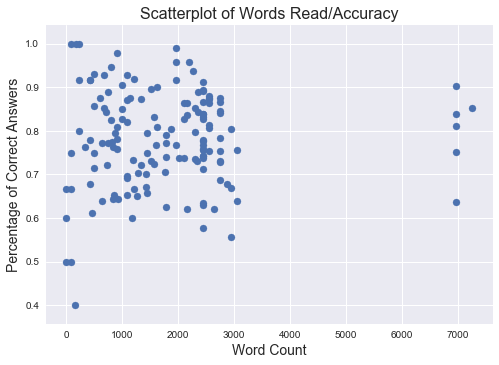

In [335]:
plt.scatter(b,a)
plt.title('Scatterplot of Words Read/Accuracy',fontsize=16)
plt.xlabel('Word Count',fontsize=14)
plt.ylabel('Percentage of Correct Answers',fontsize=14)

In [336]:
np.corrcoef(b, a)

array([[ 1.        ,  0.04860814],
       [ 0.04860814,  1.        ]])

__NOTES__


A Pearson Correlation Coefficient of 0.0486 means there is virtually no relationship between the words read and the Percentage of Correct Answers provided.



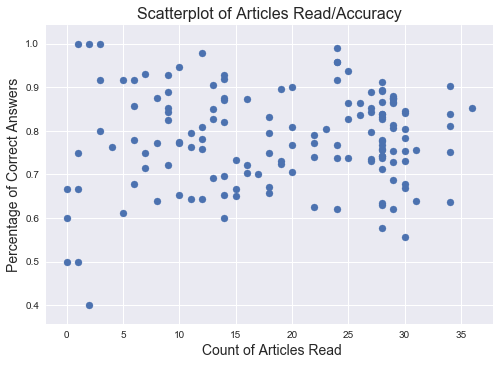

In [337]:
b = ccuRead['Total Articles Read']
plt.scatter(b,a)
plt.title('Scatterplot of Articles Read/Accuracy',fontsize=16)
plt.xlabel(' Count of Articles Read',fontsize=14)
plt.ylabel('Percentage of Correct Answers',fontsize=14)



In [338]:
np.corrcoef(b, a)

array([[ 1.        ,  0.06845189],
       [ 0.06845189,  1.        ]])

__NOTES__


A Pearson Correlation Coefficient of 0.0684 means there is also virtually no relationship between the Articles read and the Percentage of Correct Answers provided.




__How Lexile Influences Answers__
Only Looking at submitted answers


In [206]:
SnL = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Solids and Liquids.csv', error_bad_lines=False)
Moon = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.The Moon Journal.csv', error_bad_lines=False)
Touch = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Your Sense of Touch.csv', error_bad_lines=False)
Sun = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Sunlight in the Winter.csv', error_bad_lines=False)
Drums = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Different Drums.csv', error_bad_lines=False)
Food = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Finding Food.csv', error_bad_lines=False)
Lance = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Get Well Lance.csv', error_bad_lines=False)
China = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Chinese New Year.csv', error_bad_lines=False)
Star = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Star Fruits.csv', error_bad_lines=False)
Juan = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Juan Wants to Build.csv', error_bad_lines=False)
Soccer = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.How Is a Soccer Ball Made.csv', error_bad_lines=False)
Water = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Getting Water from a Well.csv', error_bad_lines=False)
Cats = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Cats Show How They Feel.csv', error_bad_lines=False)

Space = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.What is Space Like.csv', error_bad_lines=False)
Four = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.The Four Seasons.csv', error_bad_lines=False)
Ant = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Ant and Grasshopper.csv', error_bad_lines=False)
Senses = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Your Five Senses.csv', error_bad_lines=False)
Push = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Will You Push or Pull.csv', error_bad_lines=False)
City = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.City life and Country Life.csv', error_bad_lines=False)
Tree = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Parts of a Tree.csv', error_bad_lines=False)
Plastic = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.How Plastic is Recycled.csv', error_bad_lines=False)
Night = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.From Morning to Night.csv', error_bad_lines=False)



Cool = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.A Cool Pool.csv', error_bad_lines=False)
Sunny = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Cloudy and Sunny.csv', error_bad_lines=False)
Quiet = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.I Need Quiet.csv', error_bad_lines=False)
Snow = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Stuck in the Snow.csv', error_bad_lines=False)
Friend = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Articles/Readworks_CCU01.Helping a Friend.csv', error_bad_lines=False)







b'Skipping line 6: expected 5 fields, saw 6\nSkipping line 7: expected 5 fields, saw 6\n'
b'Skipping line 6: expected 5 fields, saw 6\nSkipping line 7: expected 5 fields, saw 6\n'
b'Skipping line 6: expected 5 fields, saw 6\nSkipping line 7: expected 5 fields, saw 6\n'
b'Skipping line 6: expected 5 fields, saw 6\nSkipping line 7: expected 5 fields, saw 6\n'
b'Skipping line 6: expected 5 fields, saw 6\nSkipping line 7: expected 5 fields, saw 6\n'
b'Skipping line 6: expected 5 fields, saw 6\nSkipping line 7: expected 5 fields, saw 6\n'
b'Skipping line 6: expected 5 fields, saw 6\nSkipping line 7: expected 5 fields, saw 6\n'
b'Skipping line 6: expected 5 fields, saw 6\nSkipping line 7: expected 5 fields, saw 6\n'
b'Skipping line 6: expected 5 fields, saw 6\nSkipping line 7: expected 5 fields, saw 6\n'
b'Skipping line 6: expected 5 fields, saw 6\nSkipping line 7: expected 5 fields, saw 6\n'
b'Skipping line 6: expected 5 fields, saw 6\nSkipping line 7: expected 5 fields, saw 6\n'
b'Skipping

In [113]:
 d = {}
def filtering(x):
    #find the accounts that are part of the roster
    x = x[x['Students'].str.contains('ccu01')]
    s = x['Students'].str.split().str[-1]
    x = pd.concat([x,s],axis=1)
    x.columns.values[0] = 'Name'
    x.columns.values[-1] = 'ID'
    x = x[x['ID'].isin(mp)]
    
    return x
    
def submitting(x):
    #Select only the accounts who have officially submitted their answer
    x = x.loc[x['Status']=='Submitted']
    x['Multiple Choice'] = x['Multiple Choice'].str.rstrip('%').astype('float') / 100.0
    return x


def averaging(p):
    #
    w = p.Total[1]
    p = filtering(p)
    p = submitting(p)
    d[w] = p['Multiple Choice'].mean()
    return p 




In [116]:


q = averaging(SnL)
q = averaging(Moon)
q = averaging(Touch)
q = averaging(Sun)
q = averaging(Drums)
q = averaging(Food)
q = averaging(Lance)
q = averaging(China)
q = averaging(Star)
q = averaging(Juan)
q = averaging(Soccer)
q = averaging(Water)
q = averaging(Cats)
q = averaging(Cats)
q = averaging(Space)
q = averaging(Four)
q = averaging(Ant)
q = averaging(Senses)

q = averaging(Push)
q = averaging(City)
q = averaging(Tree)
q = averaging(Plastic)
q = averaging(Night)
q = averaging(Cool)
q = averaging(Sunny)
q = averaging(Quiet)
q = averaging(Snow)
q = averaging(Friend)





/Users/georgesericcolbert/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


__Average Answer Accuracy per Article___

In [120]:
d

{'A Cool Pool!': 0.7644628099173554,
 'Ant and Grasshopper': 0.8342391304347826,
 'Cats Show How They Feel': 0.8205882352941176,
 'Chinese New Year': 0.8333333333333334,
 'City Life and Country Life': 0.7331730769230769,
 'Cloudy and Sunny': 0.858,
 'Different Drums': 0.8319672131147541,
 'Finding Food': 0.6745283018867925,
 'From Morning to Night': 0.7823275862068966,
 'Get Well Lance': 0.8244047619047619,
 'Getting Water from a Well': 0.8614457831325302,
 'Helping a Friend': 0.6766917293233082,
 'How Is a Soccer Ball Made?': 0.879746835443038,
 'How Plastic Is Recycled': 0.7676991150442478,
 'I Need Quiet!': 0.7883064516129032,
 'Juan Wants to Build': 0.7959770114942529,
 'Parts of a Tree': 0.8108108108108109,
 'Solids and Liquids': 0.47714285714285715,
 'Star Fruits': 0.7025316455696202,
 'Stuck in the Snow': 0.7274436090225563,
 'Sunlight in the Winter': 0.5753968253968254,
 'The Four Seasons': 0.8580246913580247,
 'The Moon Journal': 0.6325757575757576,
 'What Is Space Like?': 0.7

In [123]:
Babylon = pd.DataFrame(list(d.items()), columns=['Article', 'Accuracy'])

In [128]:
Lexile = pd.read_csv('~/Desktop/Projects/RAYSE ACADEMY/ReadWorks/Readworks.Articles.Lexile.Accuracy.CCU01.csv')

Lexi = pd.merge(Lexile,Babylon, how='left', on='Article')

In [130]:
lexi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 3 columns):
Article     27 non-null object
Lexile      27 non-null int64
Accuracy    27 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 864.0+ bytes


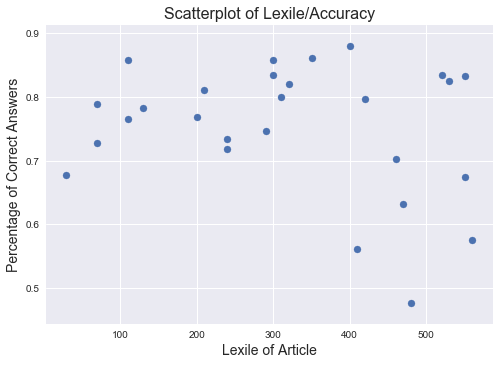

In [283]:
plt.scatter(Lexi.Lexile,Lexi.Accuracy)
plt.title('Scatterplot of Lexile/Accuracy',fontsize=16)
plt.xlabel('Lexile of Article',fontsize=14)
plt.ylabel('Percentage of Correct Answers',fontsize=14)

In [284]:
# Pearson Correlation Coefficient

np.corrcoef(Lexi.Lexile, Lexi.Accuracy)

array([[ 1.        , -0.22628554],
       [-0.22628554,  1.        ]])

__Lexile__

A PCC of -0.226 indicates that there is a weak negative relationship between the Lexile of the Article the Average Score Students on that Article.


In [273]:
m = {}


def scattering(o,p):
    w = p.Total[1]
    p = filtering(p)
    p = submitting(p)
    if o in p['ID'].values:
        spa = p.loc[p['ID']==o,['Multiple Choice']]
        spa = spa.iloc[0,0]
        #spa = p['Multiple Choice'].iloc[p.index(p['ID']==o)]
        m[w] = spa
        return spa
    else:
        return 'False'
        
scattering(Over_ach['Students'].iloc[1],SnL)        
scattering(Over_ach['Students'].iloc[1],Moon)
scattering(Over_ach['Students'].iloc[1],Touch)
scattering(Over_ach['Students'].iloc[1],Sun)
scattering(Over_ach['Students'].iloc[1],Drums)
scattering(Over_ach['Students'].iloc[1],Food)
scattering(Over_ach['Students'].iloc[1],Lance)
scattering(Over_ach['Students'].iloc[1],China)
scattering(Over_ach['Students'].iloc[1],Star)
scattering(Over_ach['Students'].iloc[1],Juan)
scattering(Over_ach['Students'].iloc[1],Soccer)
scattering(Over_ach['Students'].iloc[1],Water)
scattering(Over_ach['Students'].iloc[1],Cats)
scattering(Over_ach['Students'].iloc[1],Space)

scattering(Over_ach['Students'].iloc[1],Four)
scattering(Over_ach['Students'].iloc[1],Ant)
scattering(Over_ach['Students'].iloc[1],Senses)
scattering(Over_ach['Students'].iloc[1],Push)
scattering(Over_ach['Students'].iloc[1],City)
scattering(Over_ach['Students'].iloc[1],Tree)
scattering(Over_ach['Students'].iloc[1],Plastic)
scattering(Over_ach['Students'].iloc[1],Night)
scattering(Over_ach['Students'].iloc[1],Cool)
scattering(Over_ach['Students'].iloc[1],Sunny)
scattering(Over_ach['Students'].iloc[1],Quiet)
scattering(Over_ach['Students'].iloc[1],Snow)
scattering(Over_ach['Students'].iloc[1],Friend)

/Users/georgesericcolbert/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.75

In [282]:
Over_ach.iloc[1]

Name                        Umme Habiba ccu01s094
Nonfiction Articles Read                       24
Nonfiction Words Read                        6158
Literary Articles Read                         10
Literary Words Read                           800
Total Articles Read                            34
Total Words Read                             6958
Students                                ccu01s094
Name: 50, dtype: object

In [285]:
Sparta = pd.DataFrame(list(m.items()), columns=['Article', 'Accuracy'])
Umme_Habiba_ccu01s094 = pd.merge(Lexile,Sparta, how='left', on='Article')

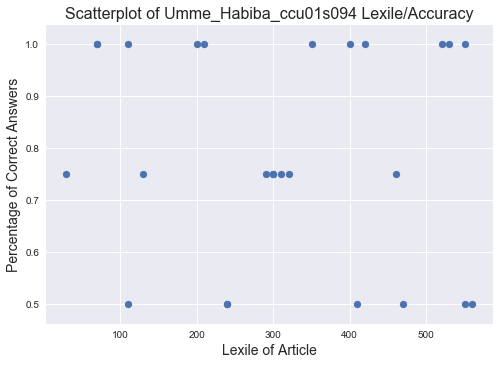

In [286]:
plt.scatter(Umme_Habiba_ccu01s094.Lexile,Umme_Habiba_ccu01s094.Accuracy)
plt.title('Scatterplot of Umme_Habiba_ccu01s094 Lexile/Accuracy',fontsize=16)
plt.xlabel('Lexile of Article',fontsize=14)
plt.ylabel('Percentage of Correct Answers',fontsize=14)

In [296]:
# Pearson Correlation Coefficient
Umme_Habiba_ccu01s094 = Umme_Habiba_ccu01s094.dropna()
np.corrcoef(Umme_Habiba_ccu01s094.Lexile, Umme_Habiba_ccu01s094.Accuracy)

array([[ 1.        , -0.11673917],
       [-0.11673917,  1.        ]])

In [287]:
Over_ach.iloc[2]

Name                        Saiqua Parveen ccu01s102
Nonfiction Articles Read                          24
Nonfiction Words Read                           6158
Literary Articles Read                            10
Literary Words Read                              800
Total Articles Read                               34
Total Words Read                                6958
Students                                   ccu01s102
Name: 56, dtype: object

In [288]:
m = {}



scattering(Over_ach['Students'].iloc[2],SnL)        
scattering(Over_ach['Students'].iloc[2],Moon)
scattering(Over_ach['Students'].iloc[2],Touch)
scattering(Over_ach['Students'].iloc[2],Sun)
scattering(Over_ach['Students'].iloc[2],Drums)
scattering(Over_ach['Students'].iloc[2],Food)
scattering(Over_ach['Students'].iloc[2],Lance)
scattering(Over_ach['Students'].iloc[2],China)
scattering(Over_ach['Students'].iloc[2],Star)
scattering(Over_ach['Students'].iloc[2],Juan)
scattering(Over_ach['Students'].iloc[2],Soccer)
scattering(Over_ach['Students'].iloc[2],Water)
scattering(Over_ach['Students'].iloc[2],Cats)
scattering(Over_ach['Students'].iloc[2],Space)

scattering(Over_ach['Students'].iloc[2],Four)
scattering(Over_ach['Students'].iloc[2],Ant)
scattering(Over_ach['Students'].iloc[2],Senses)
scattering(Over_ach['Students'].iloc[2],Push)
scattering(Over_ach['Students'].iloc[2],City)
scattering(Over_ach['Students'].iloc[2],Tree)
scattering(Over_ach['Students'].iloc[2],Plastic)
scattering(Over_ach['Students'].iloc[2],Night)
scattering(Over_ach['Students'].iloc[2],Cool)
scattering(Over_ach['Students'].iloc[2],Sunny)
scattering(Over_ach['Students'].iloc[2],Quiet)
scattering(Over_ach['Students'].iloc[2],Snow)
scattering(Over_ach['Students'].iloc[2],Friend)

/Users/georgesericcolbert/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.75

In [290]:
Sparta = pd.DataFrame(list(m.items()), columns=['Article', 'Accuracy'])
Saiqua_Parveen_ccu01s102 = pd.merge(Lexile,Sparta, how='left', on='Article')

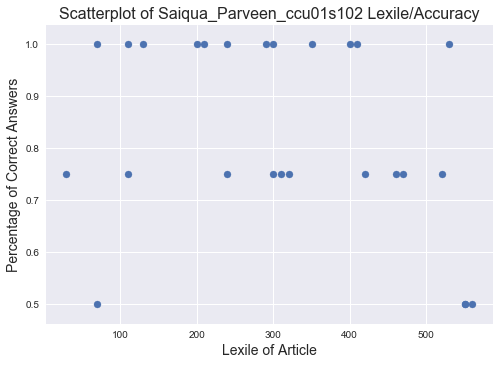

In [291]:
plt.scatter(Saiqua_Parveen_ccu01s102.Lexile,Saiqua_Parveen_ccu01s102.Accuracy)
plt.title('Scatterplot of Saiqua_Parveen_ccu01s102 Lexile/Accuracy',fontsize=16)
plt.xlabel('Lexile of Article',fontsize=14)
plt.ylabel('Percentage of Correct Answers',fontsize=14)

In [297]:
# Pearson Correlation Coefficient
Saiqua_Parveen_ccu01s102 = Saiqua_Parveen_ccu01s102.dropna()
np.corrcoef(Saiqua_Parveen_ccu01s102.Lexile, Saiqua_Parveen_ccu01s102.Accuracy)

array([[ 1.        , -0.32680988],
       [-0.32680988,  1.        ]])

In [298]:
Over_ach.iloc[3]

Name                        Sabrun Nessa ccu01s104
Nonfiction Articles Read                        24
Nonfiction Words Read                         6158
Literary Articles Read                          10
Literary Words Read                            800
Total Articles Read                             34
Total Words Read                              6958
Students                                 ccu01s104
Name: 57, dtype: object

In [299]:
m = {}



scattering(Over_ach['Students'].iloc[3],SnL)        
scattering(Over_ach['Students'].iloc[3],Moon)
scattering(Over_ach['Students'].iloc[3],Touch)
scattering(Over_ach['Students'].iloc[3],Sun)
scattering(Over_ach['Students'].iloc[3],Drums)
scattering(Over_ach['Students'].iloc[3],Food)
scattering(Over_ach['Students'].iloc[3],Lance)
scattering(Over_ach['Students'].iloc[3],China)
scattering(Over_ach['Students'].iloc[3],Star)
scattering(Over_ach['Students'].iloc[3],Juan)
scattering(Over_ach['Students'].iloc[3],Soccer)
scattering(Over_ach['Students'].iloc[3],Water)
scattering(Over_ach['Students'].iloc[3],Cats)
scattering(Over_ach['Students'].iloc[3],Space)

scattering(Over_ach['Students'].iloc[3],Four)
scattering(Over_ach['Students'].iloc[3],Ant)
scattering(Over_ach['Students'].iloc[3],Senses)
scattering(Over_ach['Students'].iloc[3],Push)
scattering(Over_ach['Students'].iloc[3],City)
scattering(Over_ach['Students'].iloc[3],Tree)
scattering(Over_ach['Students'].iloc[3],Plastic)
scattering(Over_ach['Students'].iloc[3],Night)
scattering(Over_ach['Students'].iloc[3],Cool)
scattering(Over_ach['Students'].iloc[3],Sunny)
scattering(Over_ach['Students'].iloc[3],Quiet)
scattering(Over_ach['Students'].iloc[3],Snow)
scattering(Over_ach['Students'].iloc[3],Friend)

/Users/georgesericcolbert/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.5

In [300]:
Sparta = pd.DataFrame(list(m.items()), columns=['Article', 'Accuracy'])
Sabrun_Nessa_ccu01s104 = pd.merge(Lexile,Sparta, how='left', on='Article')

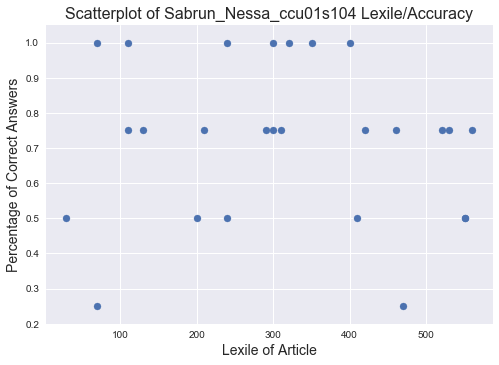

In [301]:
plt.scatter(Sabrun_Nessa_ccu01s104.Lexile,Sabrun_Nessa_ccu01s104.Accuracy)
plt.title('Scatterplot of Sabrun_Nessa_ccu01s104 Lexile/Accuracy',fontsize=16)
plt.xlabel('Lexile of Article',fontsize=14)
plt.ylabel('Percentage of Correct Answers',fontsize=14)

In [302]:
# Pearson Correlation Coefficient
Sabrun_Nessa_ccu01s104 = Sabrun_Nessa_ccu01s104.dropna()
np.corrcoef(Sabrun_Nessa_ccu01s104.Lexile, Sabrun_Nessa_ccu01s104.Accuracy)

array([[ 1.        , -0.08741586],
       [-0.08741586,  1.        ]])

In [303]:
Over_ach.iloc[4]

Name                        Nikhat Parveen ccu01s108
Nonfiction Articles Read                          24
Nonfiction Words Read                           6158
Literary Articles Read                            10
Literary Words Read                              800
Total Articles Read                               34
Total Words Read                                6958
Students                                   ccu01s108
Name: 59, dtype: object

In [304]:
m = {}



scattering(Over_ach['Students'].iloc[4],SnL)        
scattering(Over_ach['Students'].iloc[4],Moon)
scattering(Over_ach['Students'].iloc[4],Touch)
scattering(Over_ach['Students'].iloc[4],Sun)
scattering(Over_ach['Students'].iloc[4],Drums)
scattering(Over_ach['Students'].iloc[4],Food)
scattering(Over_ach['Students'].iloc[4],Lance)
scattering(Over_ach['Students'].iloc[4],China)
scattering(Over_ach['Students'].iloc[4],Star)
scattering(Over_ach['Students'].iloc[4],Juan)
scattering(Over_ach['Students'].iloc[4],Soccer)
scattering(Over_ach['Students'].iloc[4],Water)
scattering(Over_ach['Students'].iloc[4],Cats)
scattering(Over_ach['Students'].iloc[4],Space)

scattering(Over_ach['Students'].iloc[4],Four)
scattering(Over_ach['Students'].iloc[4],Ant)
scattering(Over_ach['Students'].iloc[4],Senses)
scattering(Over_ach['Students'].iloc[4],Push)
scattering(Over_ach['Students'].iloc[4],City)
scattering(Over_ach['Students'].iloc[4],Tree)
scattering(Over_ach['Students'].iloc[4],Plastic)
scattering(Over_ach['Students'].iloc[4],Night)
scattering(Over_ach['Students'].iloc[4],Cool)
scattering(Over_ach['Students'].iloc[4],Sunny)
scattering(Over_ach['Students'].iloc[4],Quiet)
scattering(Over_ach['Students'].iloc[4],Snow)
scattering(Over_ach['Students'].iloc[4],Friend)

/Users/georgesericcolbert/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.75

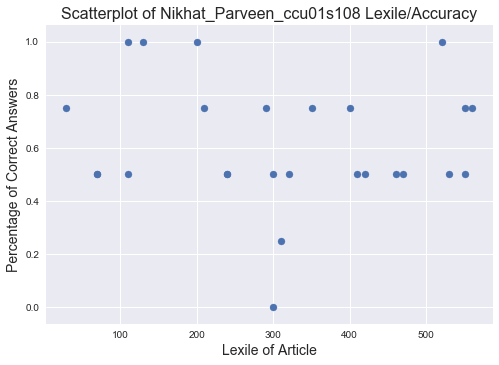

In [305]:
Sparta = pd.DataFrame(list(m.items()), columns=['Article', 'Accuracy'])
Nikhat_Parveen_ccu01s108 = pd.merge(Lexile,Sparta, how='left', on='Article')
plt.scatter(Nikhat_Parveen_ccu01s108.Lexile,Nikhat_Parveen_ccu01s108.Accuracy)
plt.title('Scatterplot of Nikhat_Parveen_ccu01s108 Lexile/Accuracy',fontsize=16)
plt.xlabel('Lexile of Article',fontsize=14)
plt.ylabel('Percentage of Correct Answers',fontsize=14)

In [306]:
# Pearson Correlation Coefficient
Nikhat_Parveen_ccu01s108 = Nikhat_Parveen_ccu01s108.dropna()
np.corrcoef(Nikhat_Parveen_ccu01s108.Lexile, Nikhat_Parveen_ccu01s108.Accuracy)

array([[ 1.        , -0.09194285],
       [-0.09194285,  1.        ]])

In [308]:
Over_ach.iloc[5]

Name                        Iqra Akhtar ccu01s347
Nonfiction Articles Read                       24
Nonfiction Words Read                        6158
Literary Articles Read                         10
Literary Words Read                           800
Total Articles Read                            34
Total Words Read                             6958
Students                                ccu01s347
Name: 132, dtype: object

In [309]:
m = {}



scattering(Over_ach['Students'].iloc[5],SnL)        
scattering(Over_ach['Students'].iloc[5],Moon)
scattering(Over_ach['Students'].iloc[5],Touch)
scattering(Over_ach['Students'].iloc[5],Sun)
scattering(Over_ach['Students'].iloc[5],Drums)
scattering(Over_ach['Students'].iloc[5],Food)
scattering(Over_ach['Students'].iloc[5],Lance)
scattering(Over_ach['Students'].iloc[5],China)
scattering(Over_ach['Students'].iloc[5],Star)
scattering(Over_ach['Students'].iloc[5],Juan)
scattering(Over_ach['Students'].iloc[5],Soccer)
scattering(Over_ach['Students'].iloc[5],Water)
scattering(Over_ach['Students'].iloc[5],Cats)
scattering(Over_ach['Students'].iloc[5],Space)

scattering(Over_ach['Students'].iloc[5],Four)
scattering(Over_ach['Students'].iloc[5],Ant)
scattering(Over_ach['Students'].iloc[5],Senses)
scattering(Over_ach['Students'].iloc[5],Push)
scattering(Over_ach['Students'].iloc[5],City)
scattering(Over_ach['Students'].iloc[5],Tree)
scattering(Over_ach['Students'].iloc[5],Plastic)
scattering(Over_ach['Students'].iloc[5],Night)
scattering(Over_ach['Students'].iloc[5],Cool)
scattering(Over_ach['Students'].iloc[5],Sunny)
scattering(Over_ach['Students'].iloc[5],Quiet)
scattering(Over_ach['Students'].iloc[5],Snow)
scattering(Over_ach['Students'].iloc[5],Friend)

/Users/georgesericcolbert/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.75

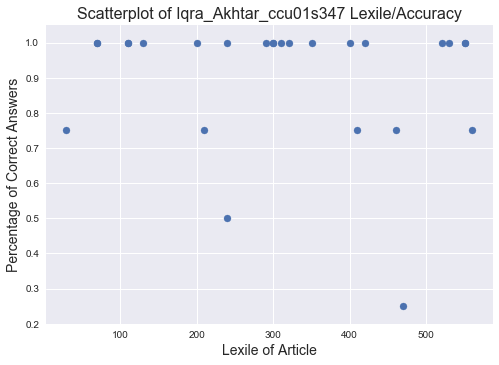

In [310]:
Sparta = pd.DataFrame(list(m.items()), columns=['Article', 'Accuracy'])
Iqra_Akhtar_ccu01s347 = pd.merge(Lexile,Sparta, how='left', on='Article')
plt.scatter(Iqra_Akhtar_ccu01s347.Lexile,Iqra_Akhtar_ccu01s347.Accuracy)
plt.title('Scatterplot of Iqra_Akhtar_ccu01s347 Lexile/Accuracy',fontsize=16)
plt.xlabel('Lexile of Article',fontsize=14)
plt.ylabel('Percentage of Correct Answers',fontsize=14)

In [311]:
# Pearson Correlation Coefficient
Iqra_Akhtar_ccu01s347 = Iqra_Akhtar_ccu01s347.dropna()
np.corrcoef(Iqra_Akhtar_ccu01s347.Lexile, Iqra_Akhtar_ccu01s347.Accuracy)

array([[ 1.        , -0.13627863],
       [-0.13627863,  1.        ]])

In [314]:
Over_ach.iloc[0]

Name                        Sumaiya Ashraf ccu01s056
Nonfiction Articles Read                          26
Nonfiction Words Read                           6457
Literary Articles Read                            10
Literary Words Read                              800
Total Articles Read                               36
Total Words Read                                7257
Students                                   ccu01s056
Name: 34, dtype: object

In [315]:
m = {}



scattering(Over_ach['Students'].iloc[0],SnL)        
scattering(Over_ach['Students'].iloc[0],Moon)
scattering(Over_ach['Students'].iloc[0],Touch)
scattering(Over_ach['Students'].iloc[0],Sun)
scattering(Over_ach['Students'].iloc[0],Drums)
scattering(Over_ach['Students'].iloc[0],Food)
scattering(Over_ach['Students'].iloc[0],Lance)
scattering(Over_ach['Students'].iloc[0],China)
scattering(Over_ach['Students'].iloc[0],Star)
scattering(Over_ach['Students'].iloc[0],Juan)
scattering(Over_ach['Students'].iloc[0],Soccer)
scattering(Over_ach['Students'].iloc[0],Water)
scattering(Over_ach['Students'].iloc[0],Cats)
scattering(Over_ach['Students'].iloc[0],Space)

scattering(Over_ach['Students'].iloc[0],Four)
scattering(Over_ach['Students'].iloc[0],Ant)
scattering(Over_ach['Students'].iloc[0],Senses)
scattering(Over_ach['Students'].iloc[0],Push)
scattering(Over_ach['Students'].iloc[0],City)
scattering(Over_ach['Students'].iloc[0],Tree)
scattering(Over_ach['Students'].iloc[0],Plastic)
scattering(Over_ach['Students'].iloc[0],Night)
scattering(Over_ach['Students'].iloc[0],Cool)
scattering(Over_ach['Students'].iloc[0],Sunny)
scattering(Over_ach['Students'].iloc[0],Quiet)
scattering(Over_ach['Students'].iloc[0],Snow)
scattering(Over_ach['Students'].iloc[0],Friend)

/Users/georgesericcolbert/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0.5

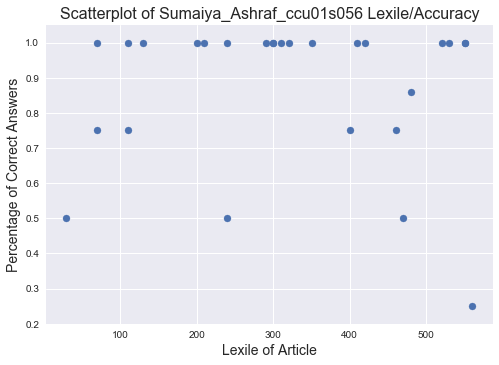

In [317]:
Sparta = pd.DataFrame(list(m.items()), columns=['Article', 'Accuracy'])
Sumaiya_Ashraf_ccu01s056 = pd.merge(Lexile,Sparta, how='left', on='Article')
plt.scatter(Sumaiya_Ashraf_ccu01s056.Lexile,Sumaiya_Ashraf_ccu01s056.Accuracy)
plt.title('Scatterplot of Sumaiya_Ashraf_ccu01s056 Lexile/Accuracy',fontsize=16)
plt.xlabel('Lexile of Article',fontsize=14)
plt.ylabel('Percentage of Correct Answers',fontsize=14)

In [318]:
# Pearson Correlation Coefficient
Sumaiya_Ashraf_ccu01s056 = Sumaiya_Ashraf_ccu01s056.dropna()
np.corrcoef(Sumaiya_Ashraf_ccu01s056.Lexile, Sumaiya_Ashraf_ccu01s056.Accuracy)

array([[ 1.        , -0.03700905],
       [-0.03700905,  1.        ]])